In [ ]:
%cd /content/drive/My Drive/cs_172b_project/

/content/drive/.shortcut-targets-by-id/1N_x4A52JJZ1qrsAemqV40plE7rZS_FTL/cs_172b_project


In [ ]:
import os
import glob
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

model_dirs = ['speecht5tts_full_pierre_dataset_avg_embedding', 'speecht5tts_full_pierre_dataset_0s_embedding', 'speecht5_tts_TheQuarksOfAttention']  # List of directories containing the trained models
loss_values = [[] for x in model_dirs]

for i, model_dir in enumerate(model_dirs):
    runs_dir = os.path.join(model_dir, "runs")

    for run_folder in os.listdir(runs_dir):
        if not os.path.isdir(os.path.join(runs_dir, run_folder)):
            continue

        event_files = glob.glob(os.path.join(runs_dir, run_folder, "events.out.tfevents.*"))
        
        # Iterate through event files with the correct prefix
        for event_file in event_files:
            event_acc = EventAccumulator(event_file)
            event_acc.Reload()

            # Extract loss values from the event file
            loss_tags = event_acc.Tags()["scalars"]
            loss_tag = [tag for tag in loss_tags if "loss" in tag.lower()]
            if loss_tag:
                loss_values[i].extend(event_acc.Scalars(loss_tag[0]))


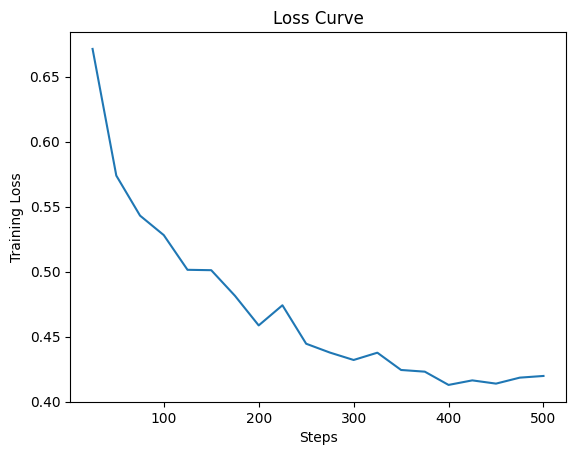

In [ ]:
# Sort the loss values by step
loss_values[0].sort(key=lambda x: x.step)

# Extract steps and loss values
steps = [value.step for value in loss_values[0]]
losses = [value.value for value in loss_values[0]]

# Plot the loss curve
plt.plot(steps, losses)
plt.xlabel("Steps")
plt.ylabel("Training Loss")
plt.title("Loss Curve")
plt.show()


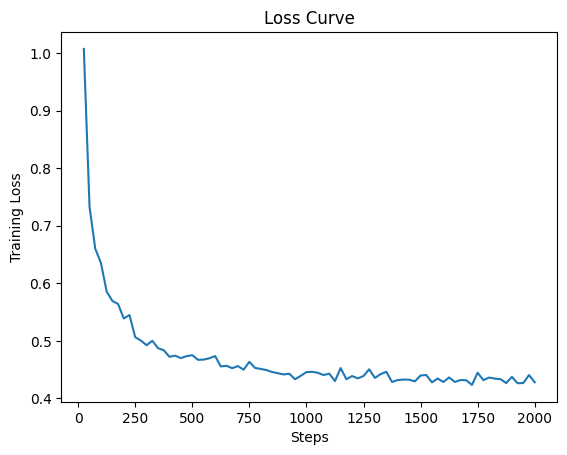

In [ ]:
# Sort the loss values by step
loss_values[1].sort(key=lambda x: x.step)

# Extract steps and loss values
steps = [value.step for value in loss_values[1]]
losses = [value.value for value in loss_values[1]]

# Plot the loss curve
plt.plot(steps, losses)
plt.xlabel("Steps")
plt.ylabel("Training Loss")
plt.title("Loss Curve")
plt.show()


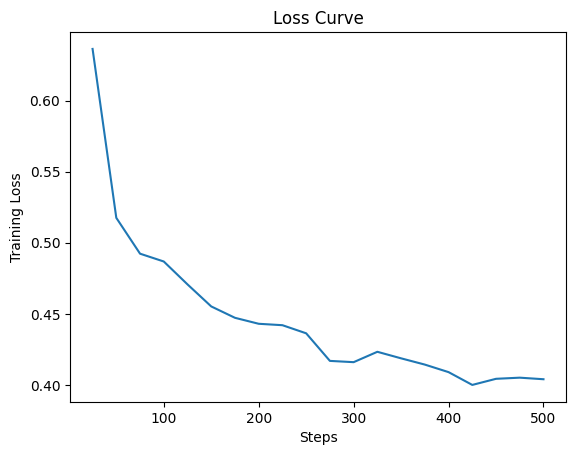

In [ ]:
# Sort the loss values by step
loss_values[2].sort(key=lambda x: x.step)

# Extract steps and loss values
steps = [value.step for value in loss_values[2]]
losses = [value.value for value in loss_values[2]]

# Plot the loss curve
plt.plot(steps, losses)
plt.xlabel("Steps")
plt.ylabel("Training Loss")
plt.title("Loss Curve")
plt.show()
